In [2]:
import numpy as np
import pandas as pd

In [3]:
#data from audio feature based model for potential performance comparison later
dl_df = pd.read_csv("data.csv")
df_df = dl_df[['name','artist','id','mood']]
dl_df

,name,artist,id,mood
0,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,Happy
1,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,Sad
2,9 Crimes,Damien Rice,5GZEeowhvSieFDiR8fQ2im,Sad
3,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,Happy
4,A Boy Brushed Red Living In Black And White,Underoath,47IWLfIKOKhFnz1FUEUIkE,Energetic
...,...,...,...,...
681,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,Calm
682,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,Sad
683,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,Sad
684,you were good to me,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,Sad


In [52]:
import requests
import json

In [5]:
token = 'BQC3SGOfF4itnVX3S72X-DOq1B3-Oxd9ghVsOcwuh9xETTKUd_oXKB9cMlFpzyz9MudIfU95bI2T1BJajt-3JhL_i03m6ffe8DZ23RnF2EK3ZfWCaIDUIumcgEXjVVs3MGFDZesXZeEkkFIzoQIsEn4TVDDEt4thPxdMfrXqHNOdRnZLV54kq_0GvlfDja9hvfR4SLpx_ClxYfHLTQ14DZU'

headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': 'Bearer ' + token,
}

playlistParams = {
        'market': 'US',
        'fields': 'items(track(name,id))',
        'limit': '100',
    }


In [6]:
#search top 5 playlists for each mood and store along with id in dataframe
playlists = pd.DataFrame()
#calm returned some weird results so replaced with relax
moods = ['happy','sad','energetic','relax']
playlist_names = []
playlist_ids = []
for mood in moods:
    params = {
    'q': mood,
    'type': 'playlist',
    'market': 'US',
    }
    spotifySearchResponse = requests.get('https://api.spotify.com/v1/search', headers=headers, params=params)
    spotifySearchJSON = json.loads(spotifySearchResponse.text)
    for i in range(5):
        playlist_names.append(spotifySearchJSON['playlists']['items'][i]['name'])
        playlist_ids.append(spotifySearchJSON['playlists']['items'][i]['id'])
playlists['name'] = playlist_names
playlists['id'] = playlist_ids
playlists

,name,id
0,Happy Beats,37i9dQZF1DWSf2RDTDayIx
1,Happy Mix,37i9dQZF1EVJSvZp5AOML2
2,This Is Happy,37i9dQZF1DZ06evO3Ybijb
3,Happy Hits!,37i9dQZF1DXdPec7aLTmlC
4,Happy Drive,37i9dQZF1DX1WSnLRtI26o
5,sad hour,37i9dQZF1DWSqBruwoIXkA
6,Sad songs to cry your heart out to 😭💔,54NczufWOFmJ5jUVvRPxaF
7,sad song club,37i9dQZF1DWYfVqUciU2jI
8,sad sierreño,37i9dQZF1DWZQGZ7yvpH00
9,sad songs for sad nights,4yXfnhz0BReoVfwwYRtPBm


In [18]:
#split dataframe into each mood
happy_playlists = playlists[0:5]
sad_playlists = playlists[5:10]
energetic_playlists = playlists[10:15]
calm_playlists = playlists[15:20]
# happy_playlists
# sad_playlists
# energetic_playlists
# calm_playlists

In [ ]:
import time
# for each audio url, change the songID to the audio url
def get_audio_url(songID):
    url = 'https://api.spotify.com/v1/tracks/' + songID
    response = requests.get(url, headers=headers)
    json_response = response.json()

    while 'error' in json_response:
        print('Error: ')
        time.sleep(1)
        response = requests.get(url, headers=headers)
        json_response = response.json()

    return json_response['preview_url']

In [27]:
#get each song in 5 'happy' playlists and add mp3 preview url to dataframe(below), do same for all moods (below)
happy_ids = []
happy_song_names = []
happy_urls = []
for Id in happy_playlists['id']:
    playlist = requests.get('https://api.spotify.com/v1/playlists/' + Id + '/tracks', headers=headers, params=playlistParams)
    for item in json.loads(playlist.text)['items']:
        happy_ids.append(item['track']['id'])
        happy_song_names.append(item['track']['name'])
for Id in happy_ids:
    happy_urls.append(get_audio_url(Id))

In [28]:
happy = pd.DataFrame()
happy['song_name'] = happy_song_names
happy['url'] = happy_urls
happy

,song_name,url
0,"L.O.V.E. (feat. EARTHGANG, Jon Batiste & Sherwyn)",https://p.scdn.co/mp3-preview/beeeace183a4afe8...
1,Something About Your Love,https://p.scdn.co/mp3-preview/9c61b5e07e38f252...
2,Bedroom Eyes (feat. Studio Killers),https://p.scdn.co/mp3-preview/adb9cea6f77dd149...
3,Antibodies - LP Giobbi Remix,https://p.scdn.co/mp3-preview/fe98419038f3a983...
4,Love You Back,https://p.scdn.co/mp3-preview/09d641ae79ea8e86...
...,...,...
395,Overpass Graffiti,https://p.scdn.co/mp3-preview/20d7d8cd281b23cb...
396,Can't Feel My Face,https://p.scdn.co/mp3-preview/3cbc44ffebc3d0e7...
397,Stupid Love,https://p.scdn.co/mp3-preview/444fe3d394144a65...
398,Jealous,https://p.scdn.co/mp3-preview/a7cf9aad8343d4e2...


In [29]:
sad_ids = []
sad_song_names = []
sad_urls = []
for Id in sad_playlists['id']:
    playlist = requests.get('https://api.spotify.com/v1/playlists/' + Id + '/tracks', headers=headers, params=playlistParams)
    for item in json.loads(playlist.text)['items']:
        sad_ids.append(item['track']['id'])
        sad_song_names.append(item['track']['name'])
for Id in sad_ids:
    sad_urls.append(get_audio_url(Id))

In [50]:
sad = pd.DataFrame()
sad['song_name'] = sad_song_names
sad['url'] = sad_urls
sad

,song_name,url
0,SLOW DANCING IN THE DARK,https://p.scdn.co/mp3-preview/198e47a60b679b05...
1,In The Kitchen,https://p.scdn.co/mp3-preview/9ee1d84bd6456a86...
2,Narcissist,https://p.scdn.co/mp3-preview/a773b081e388b2b6...
3,glimpse of us,https://p.scdn.co/mp3-preview/f4b87a144c0fb425...
4,Come Back Home,https://p.scdn.co/mp3-preview/8a6e43d2f736c343...
...,...,...
425,Your Power,https://p.scdn.co/mp3-preview/168059c60ca82872...
426,Where Is The Love?,https://p.scdn.co/mp3-preview/44af90593e1947f3...
427,Too Good At Goodbyes,https://p.scdn.co/mp3-preview/04066a8592b828e6...
428,オレンジ,https://p.scdn.co/mp3-preview/1a18fdaccb89da3f...


In [31]:
energetic_ids = []
energetic_song_names = []
energetic_urls = []
for Id in energetic_playlists['id']:
    playlist = requests.get('https://api.spotify.com/v1/playlists/' + Id + '/tracks', headers=headers, params=playlistParams)
    for item in json.loads(playlist.text)['items']:
        energetic_ids.append(item['track']['id'])
        energetic_song_names.append(item['track']['name'])
for Id in energetic_ids:
    energetic_urls.append(get_audio_url(Id))

In [32]:
energetic = pd.DataFrame()
energetic['song_name'] = energetic_song_names
energetic['url'] = energetic_urls
energetic

,song_name,url
0,The Rhythm,https://p.scdn.co/mp3-preview/426aec537bcea132...
1,More Than Friends,https://p.scdn.co/mp3-preview/eff71187fd859bda...
2,Bassline Sound,https://p.scdn.co/mp3-preview/9968c24ff98a8bff...
3,Side to Side,https://p.scdn.co/mp3-preview/212564d4f631e5f2...
4,Move Your Body,https://p.scdn.co/mp3-preview/4546bf21e73f1db1...
...,...,...
376,The Little Things (feat. Angela McCluskey) - K...,https://p.scdn.co/mp3-preview/9de5f82ca99c6afd...
377,Samurai,https://p.scdn.co/mp3-preview/881ba89ca094aab5...
378,Boost,https://p.scdn.co/mp3-preview/20ae014b8276c225...
379,Underwater,https://p.scdn.co/mp3-preview/d671b030d0053628...


In [34]:
calm_ids = []
calm_song_names = []
calm_urls = []
for Id in calm_playlists['id']:
    playlist = requests.get('https://api.spotify.com/v1/playlists/' + Id + '/tracks', headers=headers, params=playlistParams)
    for item in json.loads(playlist.text)['items']:
        calm_ids.append(item['track']['id'])
        calm_song_names.append(item['track']['name'])
for Id in calm_ids:
    calm_urls.append(get_audio_url(Id))

In [35]:
calm = pd.DataFrame()
calm['song_name'] = calm_song_names
calm['url'] = calm_urls
calm

,song_name,url
0,Mellow,https://p.scdn.co/mp3-preview/5a219d743aaaf0c2...
1,Brillo En El Mar,https://p.scdn.co/mp3-preview/d8491903f2398f8c...
2,Strewn Across,https://p.scdn.co/mp3-preview/1b0ffd89c92670f9...
3,Distant Oceans,https://p.scdn.co/mp3-preview/2f6d30f6e95c8772...
4,Repouso,https://p.scdn.co/mp3-preview/d55462cb4d4fe280...
...,...,...
495,Wormwood,https://p.scdn.co/mp3-preview/c3b55ab13bf3a0df...
496,Shrike,https://p.scdn.co/mp3-preview/688df565d7241220...
497,Like a Pearl,https://p.scdn.co/mp3-preview/f5fd5ff1c231bd6b...
498,Lover's City,https://p.scdn.co/mp3-preview/5b56089ecb331ad5...


In [58]:
#save each song from each mood into mood folder
for index,url in enumerate(happy['url']):
    try:
        mp3 = requests.get(url)
    except Exception:
        pass
    try:
        with open('mp3s/happy/'+happy['song_name'][index]+'.mp3', 'wb') as f:
            f.write(mp3.content)
    except Exception:
        pass

for index,url in enumerate(sad['url']):
    try:
        mp3 = requests.get(url)
    except Exception:
        pass
    try:
        with open('mp3s/sad/'+sad['song_name'][index]+'.mp3', 'wb') as f:
            f.write(mp3.content)
    except Exception:
        pass
            
for index,url in enumerate(energetic['url']):
    try:
        mp3 = requests.get(url)
    except Exception:
        pass
    try:
        with open('mp3s/energetic/'+energetic['song_name'][index]+'.mp3', 'wb') as f:
            f.write(mp3.content)
    except Exception:
        pass
            
for index,url in enumerate(calm['url']):
    try:
        mp3 = requests.get(url)
    except Exception:
        pass
    try:
        with open('mp3s/calm/'+calm['song_name'][index]+'.mp3', 'wb') as f:
            f.write(mp3.content)
    except Exception:
        pass

Files and directories in a specified path:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

Files and directories in a specified path:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/F

Files and directories in a specified path:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


KeyboardInterrupt: 

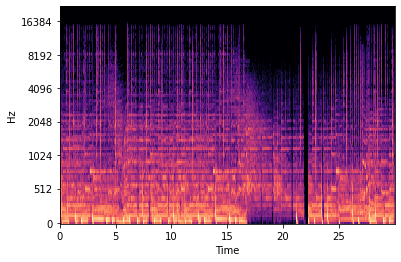

In [104]:
#read in each song from each mood folder, create mel-spectrogram, and save as png in same folder
import os
import librosa

# Load the audio file
moods = ['happy','sad','energetic','calm']
for mood in moods:
    path_of_the_directory= 'mp3s/'+mood
    print("Files and directories in a specified path:")
    for filename in os.listdir(path_of_the_directory):
        f = os.path.join(path_of_the_directory,filename)
        try:
            if os.path.isfile(f):
                samples, sample_rate = librosa.load(f, sr=None)
                sgram = librosa.stft(samples)
                # librosa.display.specshow(sgram)
                # use the mel-scale instead of raw frequency
                sgram_mag, _ = librosa.magphase(sgram)
                mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
                # librosa.display.specshow(mel_scale_sgram)
                # use the decibel scale to get the final Mel Spectrogram
                mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
                librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
    #             plt.colorbar(format='%+2.0f dB')
    #             plt.show()
                plt.savefig(path_of_the_directory+'/'+filename+'.png',bbox_inches='tight')
        except Exception:
            pass